### Вручтель Серафима. 495 группа. Метод k ближайших соседей.

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline


Сгенерируем обучающую выборку из описанных двумя признаками объектов нескольких классов.

In [3]:
# Обучающая выборка
class_A_train = scipy.stats.multivariate_normal.rvs(size=150, mean=[0, 5], cov=[[4, 1], [1, 4]])
class_B_train = scipy.stats.multivariate_normal.rvs(size=250, mean=[1.5, 0], cov=[[1, -0.5], [-0.5, 1]])

X_train = np.vstack([class_A_train, class_B_train])
y_train = np.hstack([np.zeros(len(class_A_train)), np.ones(len(class_B_train))])


# Тестовая выборка (в 3 раза больше)
class_A_test = scipy.stats.multivariate_normal.rvs(size=150 * 3, mean=[0, 5], cov=[[4, 1], [1, 4]])
class_B_test = scipy.stats.multivariate_normal.rvs(size=250 * 3, mean=[1.5, 0], cov=[[1, -0.5], [-0.5, 1]])

X_test = np.vstack([class_A_test, class_B_test])
y_test = np.hstack([np.zeros(len(class_A_test)), np.ones(len(class_B_test))])


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(400, 2) (400,)
(1200, 2) (1200,)


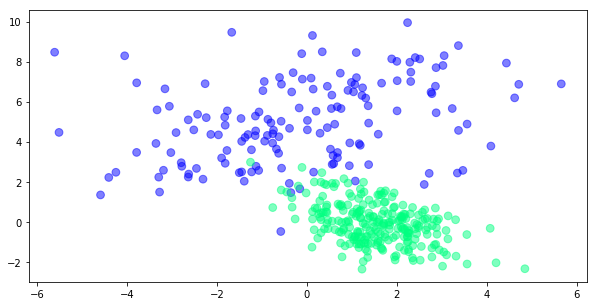

In [5]:
# Визуализация обучающей выборки

plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, s=60, cmap='winter')
plt.show()


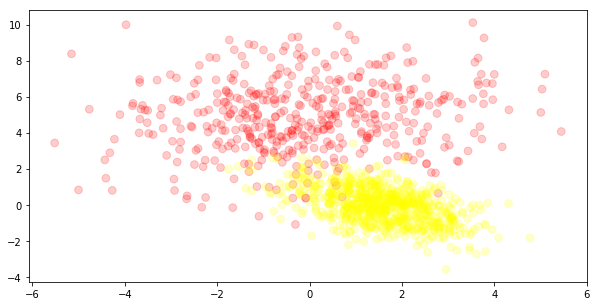

In [6]:
# Визуализация тестовой выборки

plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.2, s=60, cmap='autumn')
plt.show()


Решение задачи классификации методом k ближайших соседей для различных k.

In [1]:
# zero_one_loss - доля неправильно классифицированных объектов из выборки
# accuracy_score - доля правильно классифицированных объектов из выборки
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score


In [8]:
def generate_grid(train_sample, border=1, step=0.05):
    return np.meshgrid(np.arange(min(train_sample[:, 0]) - border, max(train_sample[:, 1]) + border, step), 
                       np.arange(min(train_sample[:, 1]) - border, max(train_sample[:, 1]) + border, step))


In [22]:
def create_picture(
    X_train, y_train, model, border=1, step=0.05, figsize=(18, 5), cmap_p='winter', cmap_a='spring', alpha=1):
    
    # Создание сетки
    grid = generate_grid(X_train, border, step)
    grid_ravel = np.c_[grid[0].ravel(), grid[1].ravel(0)]  # Выворачивание сетки
    
    # Предсказание значений для сетки
    grid_predicted_ravel = model.predict_proba(grid_ravel)[:, 1]  # Берем вероятности для первого класса
    grid_predicted = grid_predicted_ravel.reshape(grid[0].shape)  # Подгоняем размер
    
    
    # Построение фигуры
    plt.figure(figsize=figsize)
    
    plt.subplot(1, 2, 1)
    plt.pcolormesh(grid[0], grid[1], grid_predicted > 0.5, cmap=cmap_a)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=alpha, cmap=cmap_p)
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Classification {}-NN'.format(model.get_params()['n_neighbors']))
    
    plt.show()
    
    
    # Удаление лишних данных
    del(grid)
    del(grid_ravel)
    del(grid_predicted_ravel)
    del(grid_predicted)
    

/home/serafima/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


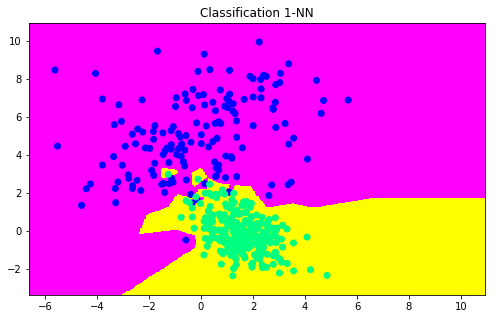

/home/serafima/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


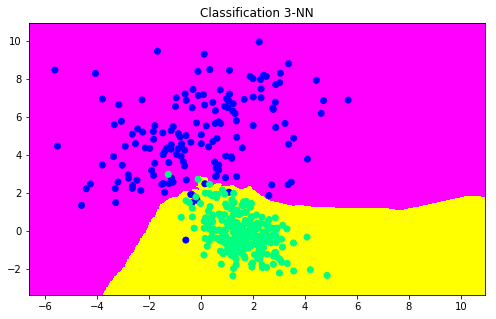

/home/serafima/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


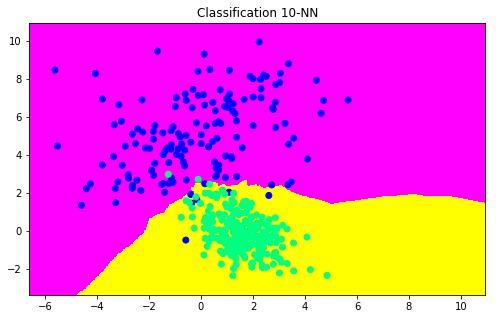

/home/serafima/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


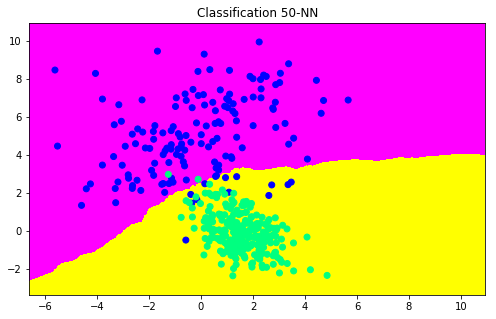

/home/serafima/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


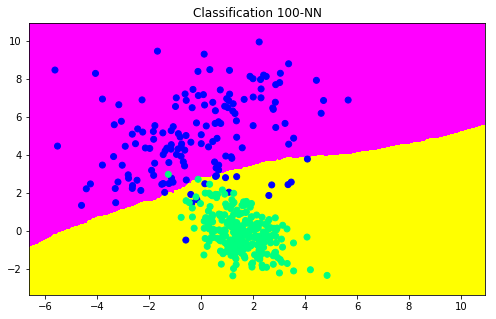

/home/serafima/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


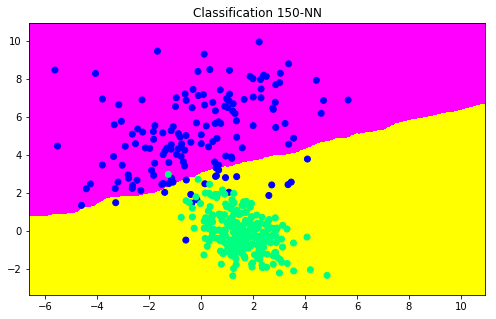

In [25]:
# Визуализируем разделяющие поверхности, получаемые при решении задачи классификации
# методом k ближайших соседей для k = 1, 3, 10, 50, 100, 150
for n_neighbors in [1, 3, 10, 50, 100, 150]:
    create_picture(X_train, y_train, KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train))
    

Попробуем подобрать оптимальное значение количества соседей k с помощью 5-fold cross-validation, построив график зависимости accuracy в кросс-валидации от k.

In [27]:
from sklearn.grid_search import GridSearchCV

/home/serafima/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/serafima/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [30]:
params = {'n_neighbors': tuple(range(1, 201))}
grid_searcher = GridSearchCV(KNeighborsClassifier(), params, cv=5, n_jobs=4)
grid_searcher.fit(X_train, y_train)

means = np.array([iteration.mean_validation_score for iteration in grid_searcher.grid_scores_])


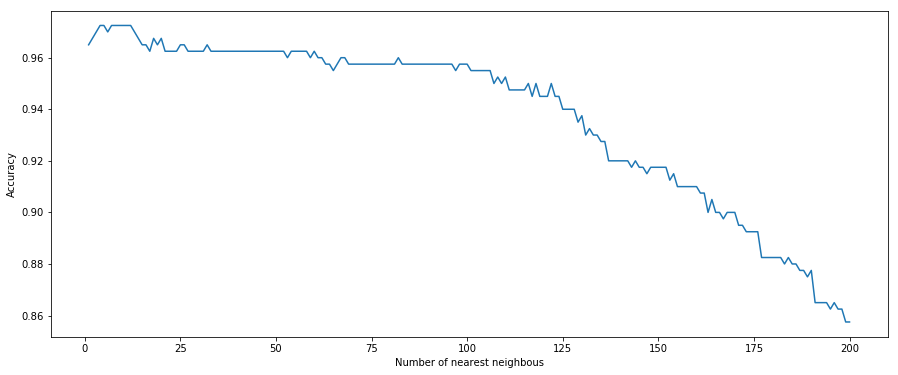

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 201), means)
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()


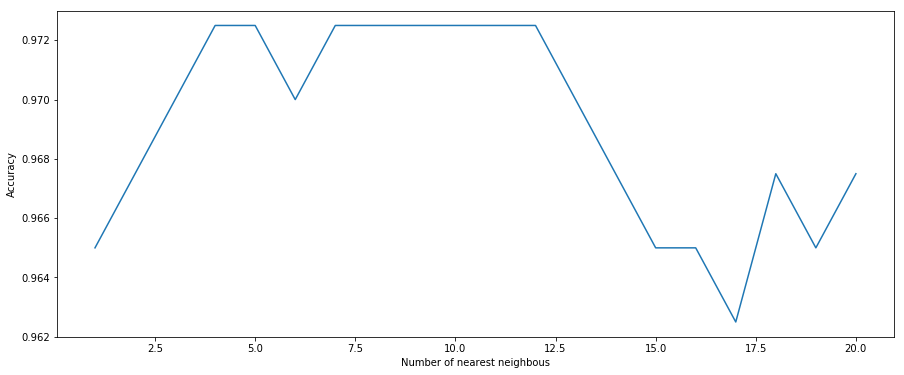

In [33]:
# Немного обрежем график
plt.figure(figsize=(15, 6))
plt.plot(range(1, 21), means[:20])
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()


Из графика можно сделать вывод, что оптимальным является количество соседей, равное k=4, 5 или от 10 до 12.